In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py

In [2]:
dataset=pd.read_csv(r"C:\Users\zabiz\Downloads\Data_Science\Tasks3/car data.csv")
dataset.head(5)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [3]:
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

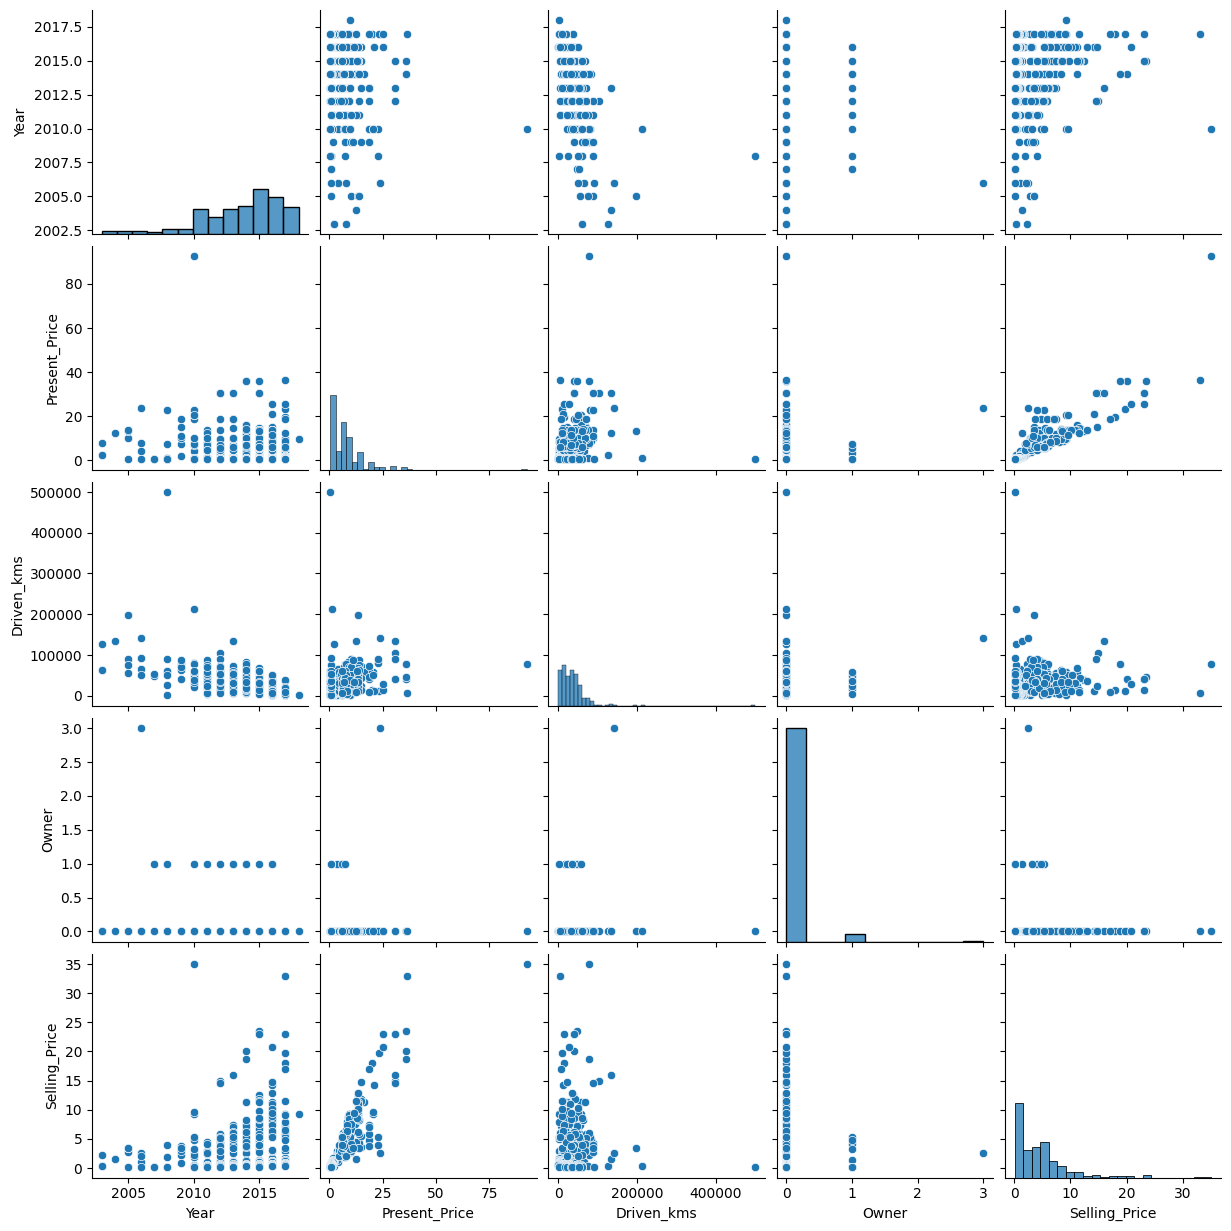

In [4]:
sns.pairplot(dataset)
plt.show()

In [5]:
dataset.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()
dataset["Car_Name"]=le.fit_transform(dataset["Car_Name"])
dataset["Fuel_Type"]=le.fit_transform(dataset["Fuel_Type"])
dataset["Transmission"]=le.fit_transform(dataset["Transmission"])
dataset["Selling_type"]=le.fit_transform(dataset["Selling_type"])



In [8]:
x=dataset.iloc[:,:-1]
y=dataset["Selling_Price"]

In [9]:
dataset

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25
3,96,2011,4.15,5200,2,0,1,0,2.85
4,92,2014,6.87,42450,1,0,1,0,4.60
...,...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0,9.50
297,66,2015,5.90,60000,2,0,1,0,4.00
298,69,2009,11.00,87934,2,0,1,0,3.35
299,69,2017,12.50,9000,1,0,1,0,11.50


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2, random_state=18)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rg=RandomForestRegressor()
rg.fit(x_train,y_train)


RandomForestRegressor()

In [14]:
rg.score(x_test,y_test)*100 ,rg.score(x_train,y_train)*100

(97.46533290977982, 98.9475746326272)

In [15]:
y_pred =rg.predict([[69,2017,12.50,9000,1,0,1,0]])
y_pred

C:\Users\zabiz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.501])

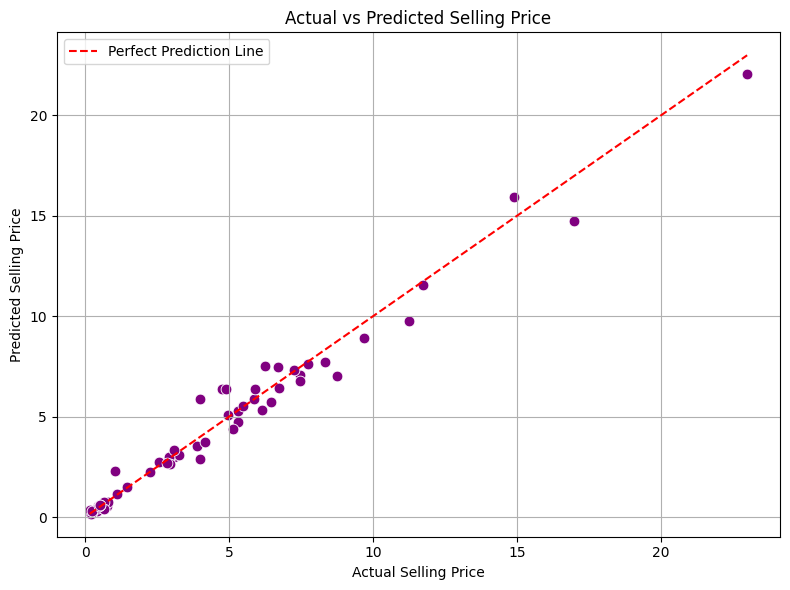

In [16]:
y_pred = rg.predict(x_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="purple", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rg.predict(x_test)  
mae = mean_absolute_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)*100
rmse = np.sqrt(mse)*100
r2 = r2_score(y_test, y_pred)*100

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



MAE: 44.9860655737705
MSE: 49.64521670491802
RMSE: 704.5936183710297
R² Score: 97.46533290977982


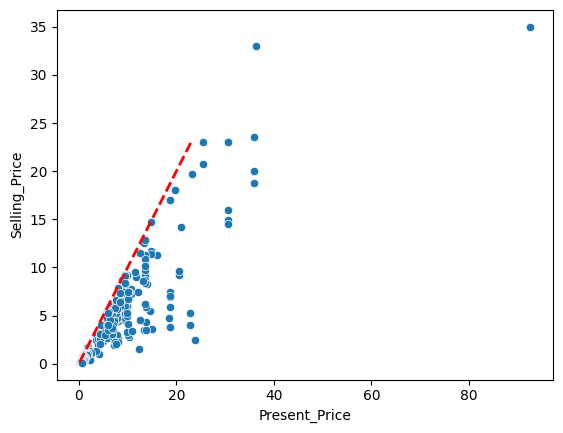

In [41]:
sns.scatterplot(x="Present_Price",y="Selling_Price",data=dataset)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.show()